Upload images...


Saving face.jpeg to face (8).jpeg
Saving coin.jpeg to coin (8).jpeg
Saving leaf.jpeg to leaf (8).jpeg
Processing face (8).jpeg...


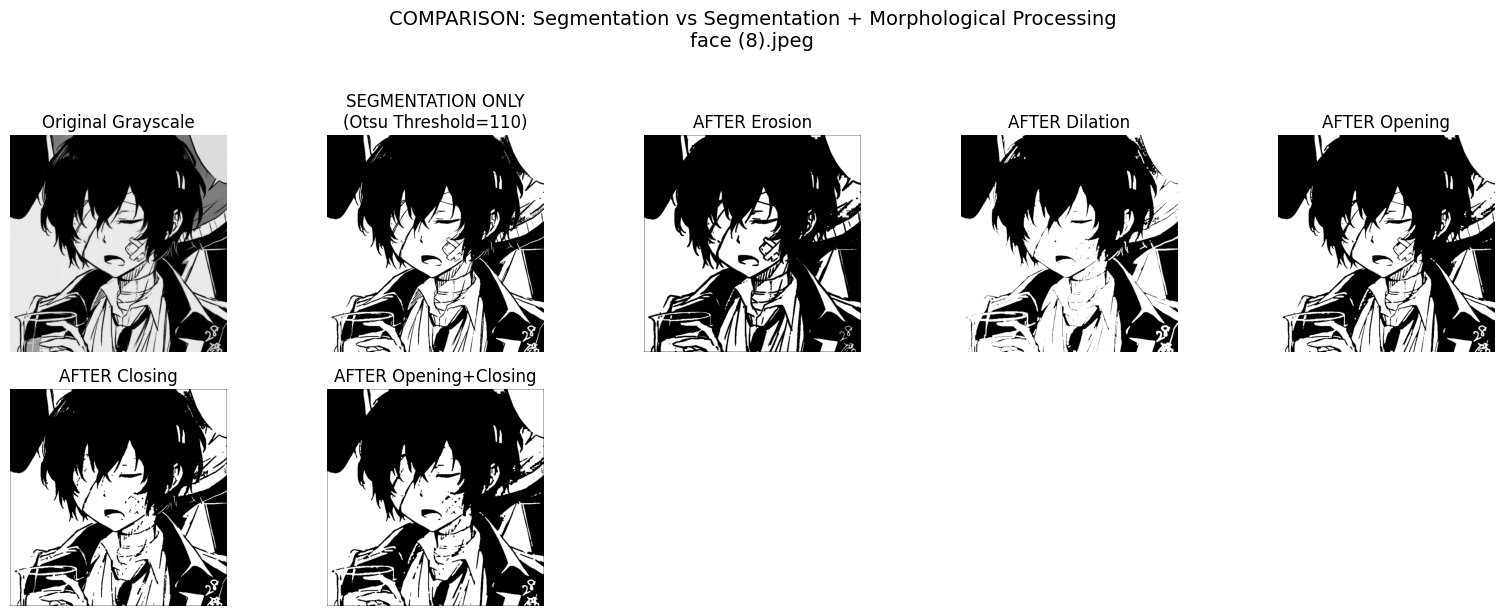

✅ Comparison completed for face (8).jpeg
Processing coin (8).jpeg...


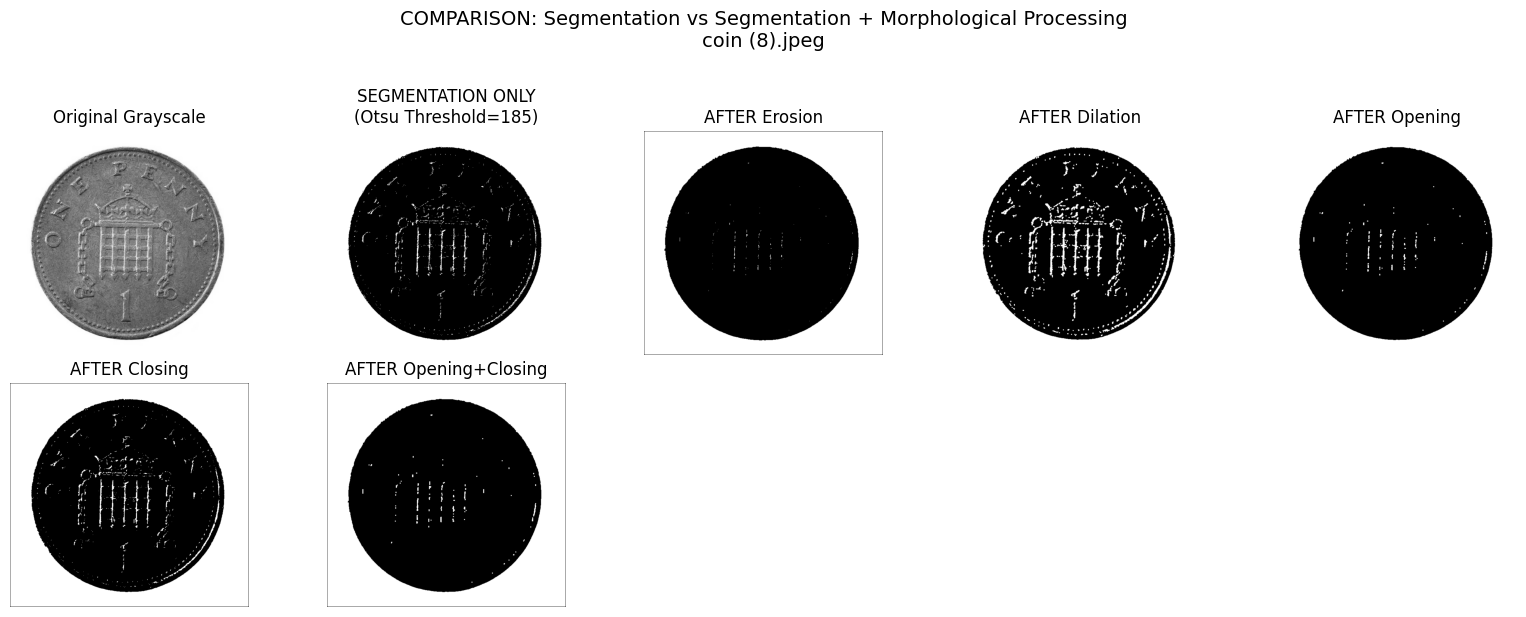

✅ Comparison completed for coin (8).jpeg
Processing leaf (8).jpeg...


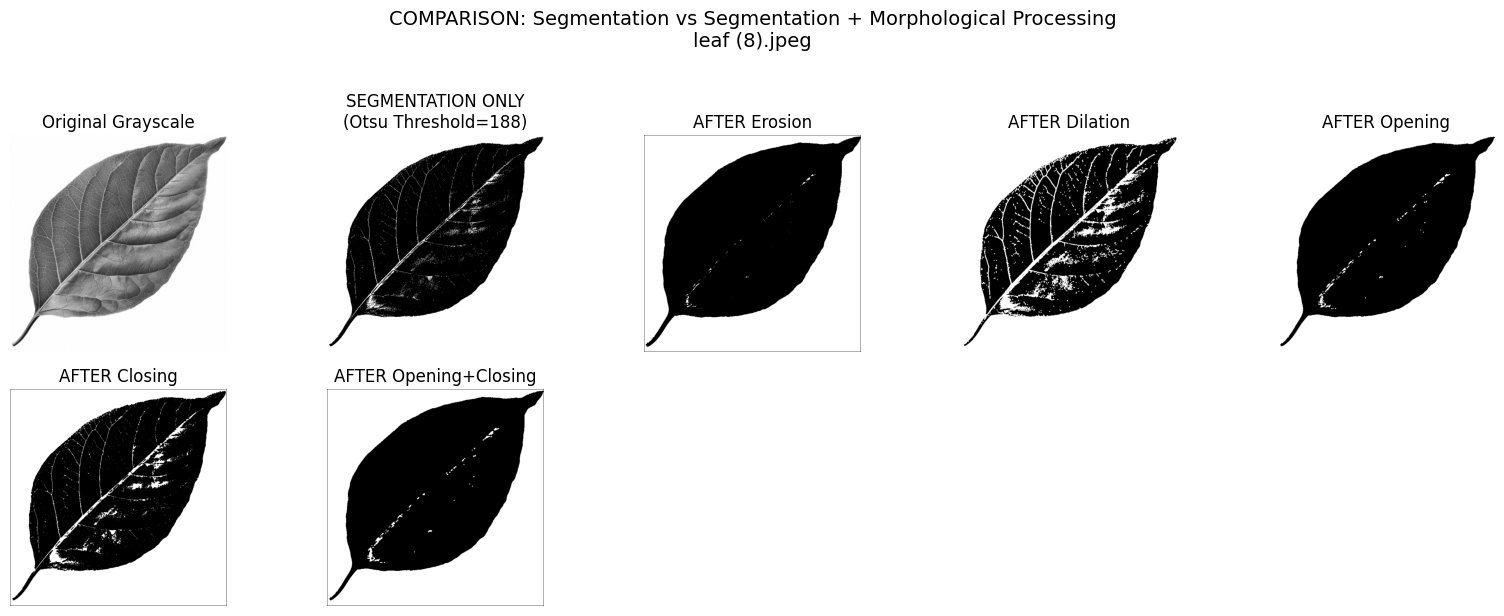

✅ Comparison completed for leaf (8).jpeg
ASSIGNMENT COMPLETE: Segmentation + Morphological Processing


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import os

# =====================
# UPLOAD IMAGES
# =====================
print("Upload images...")
uploaded = files.upload()
file_names = list(uploaded.keys())

# =====================
# CUSTOM MORPHOLOGICAL FUNCTIONS (NO LIBRARY)
# =====================
def pad(img, pad_size=1):
    h, w = img.shape
    new_img = np.zeros((h+2*pad_size, w+2*pad_size), dtype=img.dtype)
    new_img[pad_size:-pad_size, pad_size:-pad_size] = img
    return new_img

def erosion(binary_img):
    padded = pad(binary_img)
    h, w = binary_img.shape
    result = np.zeros_like(binary_img)
    for i in range(h):
        for j in range(w):
            if np.all(padded[i:i+3, j:j+3] == 1):
                result[i, j] = 1
    return result

def dilation(binary_img):
    padded = pad(binary_img)
    h, w = binary_img.shape
    result = np.zeros_like(binary_img)
    for i in range(h):
        for j in range(w):
            if np.any(padded[i:i+3, j:j+3] == 1):
                result[i, j] = 1
    return result

def opening(img):
    return dilation(erosion(img))

def closing(img):
    return erosion(dilation(img))

# =====================
# SEGMENTATION FUNCTION
# =====================
def segment(img, threshold=128):
    return (img > threshold).astype(np.uint8)

def otsu_threshold(img):
    """OTSU THRESHOLD - Automatic optimal threshold"""
    hist, _ = np.histogram(img.flatten(), 256, [0,256])
    prob = hist / hist.sum()

    max_variance = 0
    optimal_threshold = 128

    for t in range(1, 256):
        w0 = prob[:t].sum()
        w1 = prob[t:].sum()
        if w0 == 0 or w1 == 0:
            continue
        mean0 = np.sum(np.arange(t) * prob[:t]) / w0
        mean1 = np.sum(np.arange(t, 256) * prob[t:]) / w1
        variance = w0 * w1 * (mean0 - mean1) ** 2
        if variance > max_variance:
            max_variance = variance
            optimal_threshold = t

    return optimal_threshold

# =====================
# PROCESS AND COMPARE
# =====================
for fname in file_names:
    print(f"Processing {fname}...")

    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # SEGMENTATION dengan Otsu (optimal)
    otsu_thresh = otsu_threshold(gray)
    segmented = segment(gray, threshold=otsu_thresh)

    # APPLY MORPHOLOGICAL OPERATIONS
    segmented_eroded = erosion(segmented)
    segmented_dilated = dilation(segmented)
    segmented_opened = opening(segmented)
    segmented_closed = closing(segmented)
    segmented_cleaned = closing(opening(segmented))

    # COMPARISON PLOT
    plt.figure(figsize=(16, 6))

    # BEFORE Morphology
    plt.subplot(2, 5, 1)
    plt.imshow(gray, cmap='gray')
    plt.title("Original Grayscale")
    plt.axis('off')

    plt.subplot(2, 5, 2)
    plt.imshow(segmented * 255, cmap='gray')  # <-- scaled for better visualization
    plt.title(f"SEGMENTATION ONLY\n(Otsu Threshold={otsu_thresh})")
    plt.axis('off')

    # AFTER Morphology
    operations = [
        segmented_eroded, segmented_dilated, segmented_opened,
        segmented_closed, segmented_cleaned
    ]
    titles = [
        "AFTER Erosion", "AFTER Dilation", "AFTER Opening",
        "AFTER Closing", "AFTER Opening+Closing"
    ]

    for i, (op_img, title) in enumerate(zip(operations, titles)):
        plt.subplot(2, 5, i+3)
        plt.imshow(op_img * 255, cmap='gray')  # <-- scaled for better visualization
        plt.title(title)
        plt.axis('off')

    plt.suptitle(f"COMPARISON: Segmentation vs Segmentation + Morphological Processing\n{fname}",
                 fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

    print(f"✅ Comparison completed for {fname}")

print("ASSIGNMENT COMPLETE: Segmentation + Morphological Processing")
